In [8]:
import NO_utils_multiple
import NO_utils
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

## Load and visualize data

In [9]:
def load_and_process_dataset(data_path, print_dataset=True):
    start_time = time.time()
    (designs, design_params, n_designs, n_panes, design_res,
     WAVEVECTOR_DATA, WAVEFORM_DATA, n_dim, n_wavevectors,
     EIGENVALUE_DATA, n_bands, EIGENVECTOR_DATA_x,
     EIGENVECTOR_DATA_y, const, N_struct,
     imag_tol, rng_seed_offset) = NO_utils.extract_data(data_path)

    print(f"Loading dataset path: {data_path}")
    # Take first pane of designs
    designs = designs[:,0,:,:]

    # Convert WAVEVECTOR_DATA to spatial domain
    WAVEFORM_DATA = NO_utils_multiple.embed_2const_wavelet(WAVEVECTOR_DATA[0,:,0], WAVEVECTOR_DATA[0,:,1], size=design_res) #(600, 325, 2)

    # Convert all bands to spatial domain
    bands = np.arange(1, n_bands + 1)
    bands_fft = NO_utils_multiple.embed_integer_wavelet(bands, size=design_res)

    # Create the result dictionary
    dataset = {
        "designs": designs, "design_params": design_params, "n_designs": n_designs,
        "WAVEVECTOR_DATA": WAVEVECTOR_DATA, "WAVEFORM_DATA": WAVEFORM_DATA,
        "EIGENVALUE_DATA": EIGENVALUE_DATA, "EIGENVECTOR_DATA_x": EIGENVECTOR_DATA_x,
        "EIGENVECTOR_DATA_y": EIGENVECTOR_DATA_y, "bands_fft": bands_fft
    }
    
    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print dataset sizes and elapsed time
    if print_dataset:
        print(f"Dataset loaded from {data_path}:")
        for key, value in dataset.items():
            print(f"  {key}: {np.shape(value)}")
        print(f"Elapsed time: {elapsed_time:.2f} seconds")
    
    return dataset

def save_dataset(save_path, designs=None, design_params=None, waveforms=None, wavevectors=None, 
                eigenvalue_data=None, eigenvector_data_x=None, eigenvector_data_y=None, bands_fft=None):
    """
    Save dataset arrays to a specified path.
    
    Parameters:
    - save_path: Path to save the dataset
    - designs: Array of design patterns (optional)
    - design_params: Array of design parameters (optional)
    - waveforms: Array of waveform data (optional)
    - wavevectors: Array of wavevector data (optional)
    - eigenvalue_data: Array of eigenvalues (optional)
    - eigenvector_data_x: Array of x-component eigenvectors (optional)
    - eigenvector_data_y: Array of y-component eigenvectors (optional)
    - bands_fft: Array of band data in Fourier space (optional)
    """
    os.makedirs(save_path, exist_ok=True)
    
    print(f"Dataset saved to {save_path}")
    
    # Save each array with np.save if provided
    if designs is not None:
        np.save(os.path.join(save_path, 'designs.npy'), designs)
        saved_arrays = ['designs']
    if design_params is not None:
        np.save(os.path.join(save_path, 'design_params.npy'), design_params)
        saved_arrays.append('design_params')
    if waveforms is not None:
        np.save(os.path.join(save_path, 'waveforms.npy'), waveforms)
        saved_arrays.append('waveforms')
    if wavevectors is not None:
        np.save(os.path.join(save_path, 'wavevectors.npy'), wavevectors)
        saved_arrays.append('wavevectors')
    if eigenvalue_data is not None:
        np.save(os.path.join(save_path, 'eigenvalue_data.npy'), eigenvalue_data)
        saved_arrays.append('eigenvalue_data')
    if eigenvector_data_x is not None:
        np.save(os.path.join(save_path, 'eigenvector_data_x.npy'), eigenvector_data_x)
        saved_arrays.append('eigenvector_data_x')
    if eigenvector_data_y is not None:
        np.save(os.path.join(save_path, 'eigenvector_data_y.npy'), eigenvector_data_y)
        saved_arrays.append('eigenvector_data_y')
    if bands_fft is not None:
        np.save(os.path.join(save_path, 'bands_fft.npy'), bands_fft)
        saved_arrays.append('bands_fft')
    
    print(f"Saved arrays: {', '.join(saved_arrays)}")

def load_dataset(load_path, drop_redundant=True):
    """
    Load dataset arrays from a specified path.
    
    Parameters:
    - load_path: Path to load the dataset from
    
    Returns:
    - designs: Array of design patterns
    - design_params: Array of design parameters
    - waveforms: Array of waveform data
    - wavevectors: Array of wavevector data
    - eigenvalue_data: Array of eigenvalues
    - eigenvector_data_x: Array of x-component eigenvectors
    - eigenvector_data_y: Array of y-component eigenvectors
    - bands_fft: Array of band data in Fourier space
    """
    if not os.path.exists(load_path):
        raise FileNotFoundError(f"Dataset directory {load_path} does not exist")
    
    # Load each array with np.load
    if drop_redundant:
        designs = np.load(os.path.join(load_path, 'designs.npy'))
        waveforms = np.load(os.path.join(load_path, 'waveforms.npy'))
        wavevectors = np.load(os.path.join(load_path, 'wavevectors.npy'))
    else:
        designs = np.load(os.path.join(load_path, 'designs.npy'))
        waveforms = np.load(os.path.join(load_path, 'waveforms.npy'))
        wavevectors = np.load(os.path.join(load_path, 'wavevectors.npy'))
    design_params = np.load(os.path.join(load_path, 'design_params.npy'))
    eigenvalue_data = np.load(os.path.join(load_path, 'eigenvalue_data.npy'))
    eigenvector_data_x = np.load(os.path.join(load_path, 'eigenvector_data_x.npy'))
    eigenvector_data_y = np.load(os.path.join(load_path, 'eigenvector_data_y.npy'))
    bands_fft = np.load(os.path.join(load_path, 'bands_fft.npy'))
    
    print(f"Dataset loaded from {load_path}")
    
    return designs, design_params, waveforms, wavevectors, eigenvalue_data, eigenvector_data_x, eigenvector_data_y, bands_fft

In [10]:
# Load and extract data
# Define paths for both datasets
datafolder1_name = ["data", "set 1"]
datafolder2_name = ["data", "set 2"]
datafolder3_name = ["data", "set 3"]

data_path1 = os.path.join(*datafolder1_name)
data_path2 = os.path.join(*datafolder2_name)
data_path3 = os.path.join(*datafolder3_name)

# # Load and process datasets
# dataset1 = load_and_process_dataset(data_path1)
# designs = dataset1["designs"]
# design_params = dataset1["design_params"]
# eigenvalue_data = dataset1["EIGENVALUE_DATA"]
# eigenvector_data_x = dataset1["EIGENVECTOR_DATA_x"]
# eigenvector_data_y = dataset1["EIGENVECTOR_DATA_y"]
# #Take unique subset of waveforms    
# waveforms = dataset1["WAVEFORM_DATA"]
# wavevectors = dataset1["WAVEVECTOR_DATA"]
# bands_fft = dataset1["bands_fft"]
# print("Dataset 1 loaded and saved.")
# print(f"Wavevectors shape: {wavevectors.shape}")
# print(f"Waveforms shape: {waveforms.shape}")
# save_dataset(data_path1, dataset1["designs"], 
#              dataset1["design_params"], 
#              dataset1["WAVEFORM_DATA"], 
#              dataset1["WAVEVECTOR_DATA"],
#              dataset1["EIGENVALUE_DATA"], 
#              dataset1["EIGENVECTOR_DATA_x"], 
#              dataset1["EIGENVECTOR_DATA_y"], 
#              dataset1["bands_fft"])
# # Free up memory by deleting dataset1
# del dataset1

# dataset2 = load_and_process_dataset(data_path2)
# designs = np.concatenate([designs, dataset2["designs"]], axis=0)
# design_params = np.concatenate([design_params, dataset2["design_params"]], axis=0)
# eigenvalue_data = np.concatenate([eigenvalue_data, dataset2["EIGENVALUE_DATA"]], axis=0)
# eigenvector_data_x = np.concatenate([eigenvector_data_x, dataset2["EIGENVECTOR_DATA_x"]], axis=0)
# eigenvector_data_y = np.concatenate([eigenvector_data_y, dataset2["EIGENVECTOR_DATA_y"]], axis=0)
# # waveforms should be the same for each dataset
# # bands_ftt should be the same for each dataset
# save_dataset(data_path2, dataset2["designs"],
#              dataset2["design_params"],
#              dataset2["WAVEFORM_DATA"],
#              dataset2["WAVEVECTOR_DATA"],
#              dataset2["EIGENVALUE_DATA"],
#              dataset2["EIGENVECTOR_DATA_x"],
#              dataset2["EIGENVECTOR_DATA_y"],
#              dataset2["bands_fft"])
# # Free up memory by deleting dataset2
# del dataset2

# dataset3 = load_and_process_dataset(data_path3)
# designs = np.concatenate([designs, dataset3["designs"]], axis=0)
# design_params = np.concatenate([design_params, dataset3["design_params"]], axis=0)
# eigenvalue_data = np.concatenate([eigenvalue_data, dataset3["EIGENVALUE_DATA"]], axis=0)
# eigenvector_data_x = np.concatenate([eigenvector_data_x, dataset3["EIGENVECTOR_DATA_x"]], axis=0)
# eigenvector_data_y = np.concatenate([eigenvector_data_y, dataset3["EIGENVECTOR_DATA_y"]], axis=0)
# # waveforms should be the same for each dataset
# # bands_ftt should be the same for each dataset
# save_dataset(data_path3, dataset3["designs"],
#              dataset3["design_params"],
#              dataset3["WAVEFORM_DATA"],
#              dataset3["WAVEVECTOR_DATA"],
#              dataset3["EIGENVALUE_DATA"],
#              dataset3["EIGENVECTOR_DATA_x"],
#              dataset3["EIGENVECTOR_DATA_y"],
#              dataset3["bands_fft"])
# # Free up memory by deleting dataset3
# del dataset3

### Load data converted to np arrays ###
designs, design_params, waveforms, wavevectors, eigenvalue_data, eigenvector_data_x, eigenvector_data_y, bands_fft = load_dataset(data_path1)

Dataset loaded from data\set 1


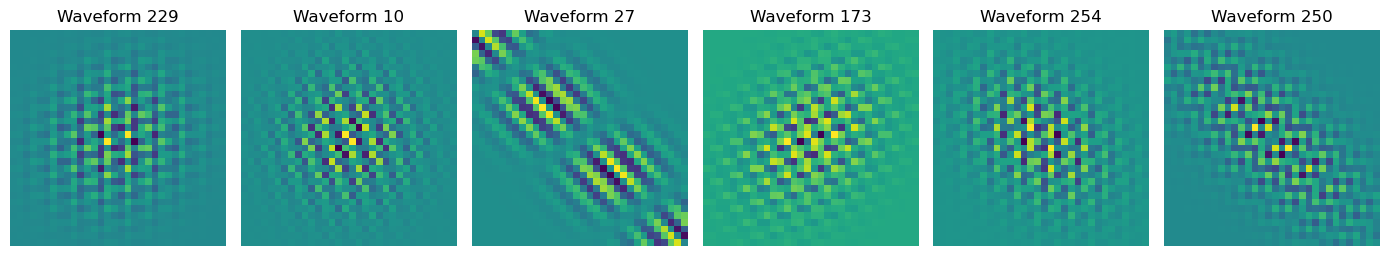

In [11]:
# Plot 5 random sample waveform images
random_indices = np.random.choice(waveforms.shape[0], size=6, replace=False)

plt.figure(figsize=(14,4))  # Made figure wider to accommodate colorbar

for i, idx in enumerate(random_indices):
    plt.subplot(1,6,i+1)
    im = plt.imshow(waveforms[idx], cmap='viridis')
    plt.title(f'Waveform {idx}')
    plt.axis('off')

# Add colorbar to the right of all subplots
#plt.colorbar(im, ax=plt.gcf().axes, location='right')

plt.tight_layout()
plt.show()

In [12]:
#Print shapes of arrays
print(f'shape of designs: {np.shape(designs)}')
print(f'shape of waveforms: {np.shape(waveforms)}')
print(f'shape of wavevectors: {np.shape(wavevectors)}')
print(f'shape of EIGENVALUE_DATA: {np.shape(eigenvalue_data)}')
print(f'shape of EIGENVECTOR_DATA_x: {np.shape(eigenvector_data_x)}')
print(f'shape of EIGENVECTOR_DATA_y: {np.shape(eigenvector_data_y)}')
print(f'shape of band_fft: {np.shape(bands_fft)}')

n_designs = np.shape(designs)[0]
n_bands = np.shape(bands_fft)[0]
n_waveforms = np.shape(waveforms)[0]
print(f'number of designs: {n_designs}')
print(f'number of bands: {n_bands}')
print(f'number of waveforms: {n_waveforms}')

# Print the max and min values of all the arrays with a size of 400 in its first dimension.
print(f'Max value of designs: {np.max(designs)}')
print(f'Min value of designs: {np.min(designs)}')
print(f'Max value of WAVEFORM_DATA: {np.max(waveforms)}')
print(f'Min value of WAVEFORM_DATA: {np.min(waveforms)}')
print(f'Max value of WAVEVECTOR_DATA_x: {np.max(eigenvector_data_x)}')
print(f'Min value of WAVEVECTOR_DATA_x: {np.min(eigenvector_data_x)}')
print(f'Max value of WAVEVECTOR_DATA_y: {np.max(eigenvector_data_y)}')
print(f'Min value of WAVEVECTOR_DATA_y: {np.min(eigenvector_data_y)}')

shape of designs: (600, 32, 32)
shape of waveforms: (325, 32, 32)
shape of wavevectors: (600, 325, 2)
shape of EIGENVALUE_DATA: (600, 325, 6)
shape of EIGENVECTOR_DATA_x: (600, 325, 6, 32, 32)
shape of EIGENVECTOR_DATA_y: (600, 325, 6, 32, 32)
shape of band_fft: (6, 32, 32)
number of designs: 600
number of bands: 6
number of waveforms: 325
Max value of designs: 1.0
Min value of designs: 0.0
Max value of WAVEFORM_DATA: 0.9889414087847644
Min value of WAVEFORM_DATA: -0.9842728288376629
Max value of WAVEVECTOR_DATA_x: (0.59423828125+0j)
Min value of WAVEVECTOR_DATA_x: (-0.685546875+0j)
Max value of WAVEVECTOR_DATA_y: (0.63818359375+0.1103515625j)
Min value of WAVEVECTOR_DATA_y: (-0.59228515625-0.0186614990234375j)


In [13]:
# Flatten the arrays and plot a separate histogram showing the distribution of values for each array with a size of 400 in its first dimension. Drop any imaginary components for the eigenvectors.
designs_flat = designs.flatten()
WAVEFORM_DATA_flat = waveforms.flatten()
EIGENVECTOR_DATA_x_flat = eigenvector_data_x.flatten()
EIGENVECTOR_DATA_y_flat = eigenvector_data_y.flatten()

Checking for NANs and INFs in data:
Designs - NANs: False, INFs: False
Waveforms - NANs: False, INFs: False
Eigenvalues - NANs: False, INFs: False
Eigenvectors X - NANs: False, INFs: False
Eigenvectors Y - NANs: False, INFs: False
Bands FFT - NANs: False, INFs: False


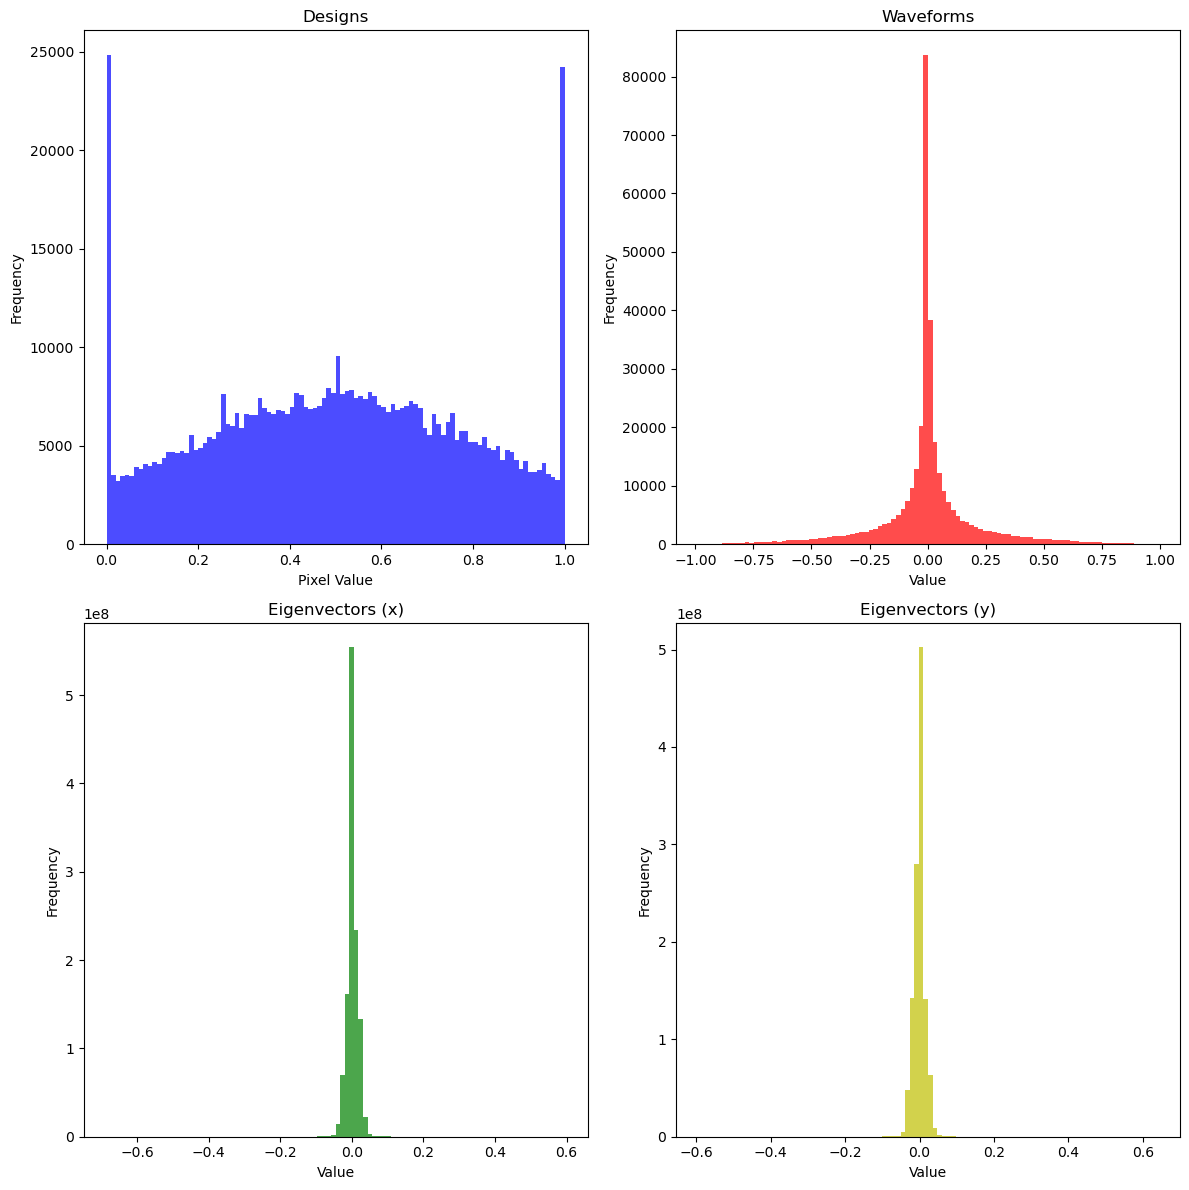

In [7]:
# Check for NANs or INFs in data
# Check for NANs and INFs in each array
print("Checking for NANs and INFs in data:")
print(f"Designs - NANs: {np.isnan(designs).any()}, INFs: {np.isinf(designs).any()}")
print(f"Waveforms - NANs: {np.isnan(waveforms).any()}, INFs: {np.isinf(waveforms).any()}")
print(f"Eigenvalues - NANs: {np.isnan(eigenvalue_data).any()}, INFs: {np.isinf(eigenvalue_data).any()}")
print(f"Eigenvectors X - NANs: {np.isnan(eigenvector_data_x).any()}, INFs: {np.isinf(eigenvector_data_x).any()}")
print(f"Eigenvectors Y - NANs: {np.isnan(eigenvector_data_y).any()}, INFs: {np.isinf(eigenvector_data_y).any()}")
print(f"Bands FFT - NANs: {np.isnan(bands_fft).any()}, INFs: {np.isinf(bands_fft).any()}")

# Plot the histograms of flattened real values for each array
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].hist(designs.flatten(), bins=100, color='b', alpha=0.7)
axes[0, 0].set_title('Designs')
axes[0, 0].set_xlabel('Pixel Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(waveforms.flatten(), bins=100, color='r', alpha=0.7)
axes[0, 1].set_title('Waveforms')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(eigenvector_data_x.flatten().real, bins=100, color='g', alpha=0.7)
axes[1, 0].set_title('Eigenvectors (x)')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(eigenvector_data_y.flatten().real, bins=100, color='y', alpha=0.7)
axes[1, 1].set_title('Eigenvectors (y)')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Draw a random design and its corresponding eigenvectors
#n_bands = 6
random_seed = 36
random.seed(random_seed)
sample_index = np.random.randint(0, n_designs)
sample_geometry = designs[sample_index]
sample_band = np.random.randint(0, n_bands)
sample_waveform_index = np.random.randint(0, n_waveforms)
sample_waveform = waveforms[sample_waveform_index]
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_waveform_index}')

# Print shapes of the samples
print(f'Sample geometry shape: {sample_geometry.shape}')
print(f'Sample waveform shape: {sample_waveform.shape}')
print(f'Sample index: {sample_index}')
print(f'Sample band: {sample_band}')
print(f'Sample waveform index: {sample_waveform_index}')

Design: 182, Band: 5, Wavevector: 127
Sample geometry shape: (32, 32)
Sample waveform shape: (32, 32)
Sample index: 182
Sample band: 5
Sample waveform index: 127


designs shape: (600, 32, 32)
WAVEFORM_DATA shape: (325, 32, 32)
Average pixel values of all geometries: 0.49760564842687216
Average pixel values of all waveforms: 0.0008113469856050465


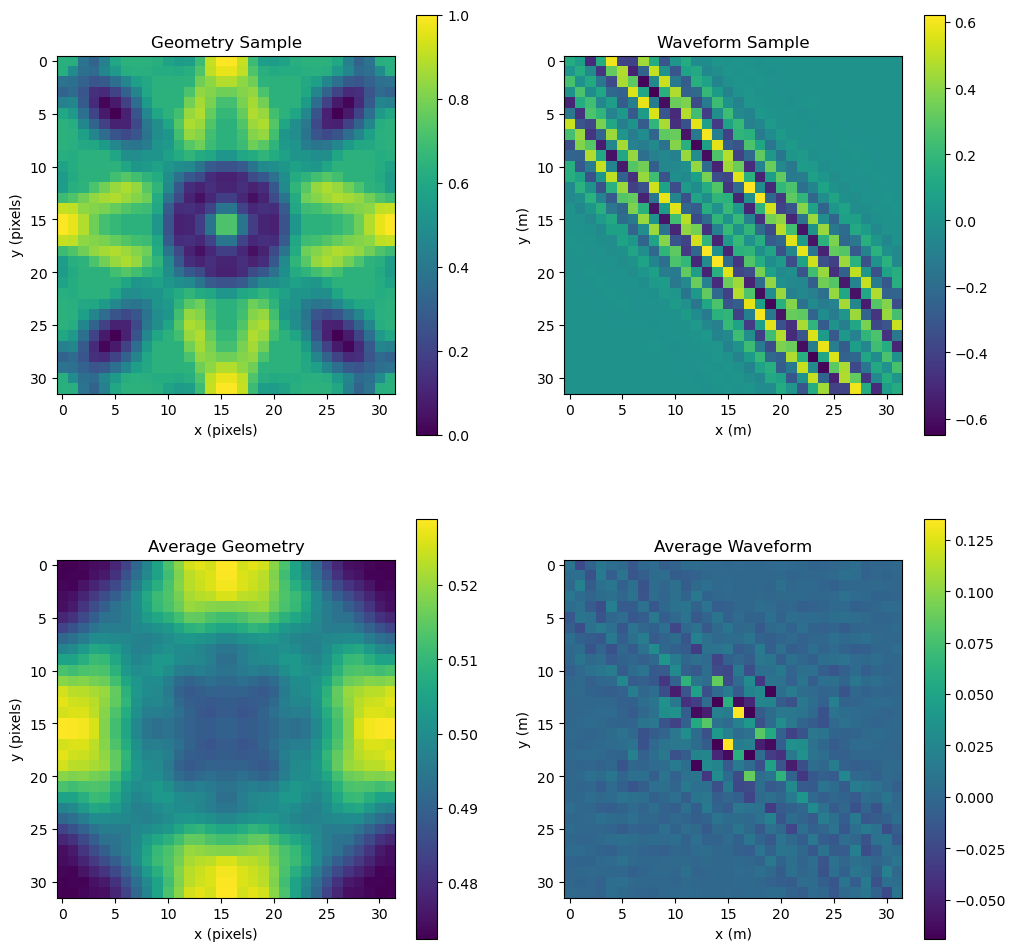

In [15]:
# Calculate the average values for geometry and waveform across all samples
print(f'designs shape: {designs.shape}')
print(f'WAVEFORM_DATA shape: {waveforms.shape}')

avg_geometry = np.mean(designs[:], axis=0)
avg_waveform = np.mean(waveforms[:], axis=0)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the geometry sample on the top-left
im1 = axes[0, 0].imshow(sample_geometry, cmap='viridis')
axes[0, 0].set_title('Geometry Sample')
axes[0, 0].set_xlabel('x (pixels)')
axes[0, 0].set_ylabel('y (pixels)')
plt.colorbar(im1, ax=axes[0, 0])

# Plot the waveform sample on the top-right
im2 = axes[0, 1].imshow(sample_waveform, cmap='viridis')
axes[0, 1].set_title('Waveform Sample')
axes[0, 1].set_xlabel('x (m)')
axes[0, 1].set_ylabel('y (m)')
plt.colorbar(im2, ax=axes[0, 1])

# Plot the average geometry on the bottom-left
im3 = axes[1, 0].imshow(avg_geometry, cmap='viridis')
axes[1, 0].set_title('Average Geometry')
axes[1, 0].set_xlabel('x (pixels)')
axes[1, 0].set_ylabel('y (pixels)')
plt.colorbar(im3, ax=axes[1, 0])

# Plot the average waveform on the bottom-right
im4 = axes[1, 1].imshow(avg_waveform, cmap='viridis')
axes[1, 1].set_title('Average Waveform')
axes[1, 1].set_xlabel('x (m)')
axes[1, 1].set_ylabel('y (m)')
plt.colorbar(im4, ax=axes[1, 1])

print(f'Average pixel values of all geometries: {np.mean(designs[:,0])}')
print(f'Average pixel values of all waveforms: {np.mean(waveforms[0,:])}')

Design: 182, Band: 5, Wavevector: 127


c:\Users\hz283\Documents\Duke\Research\NO-2D-Metamaterials\NO_utils.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


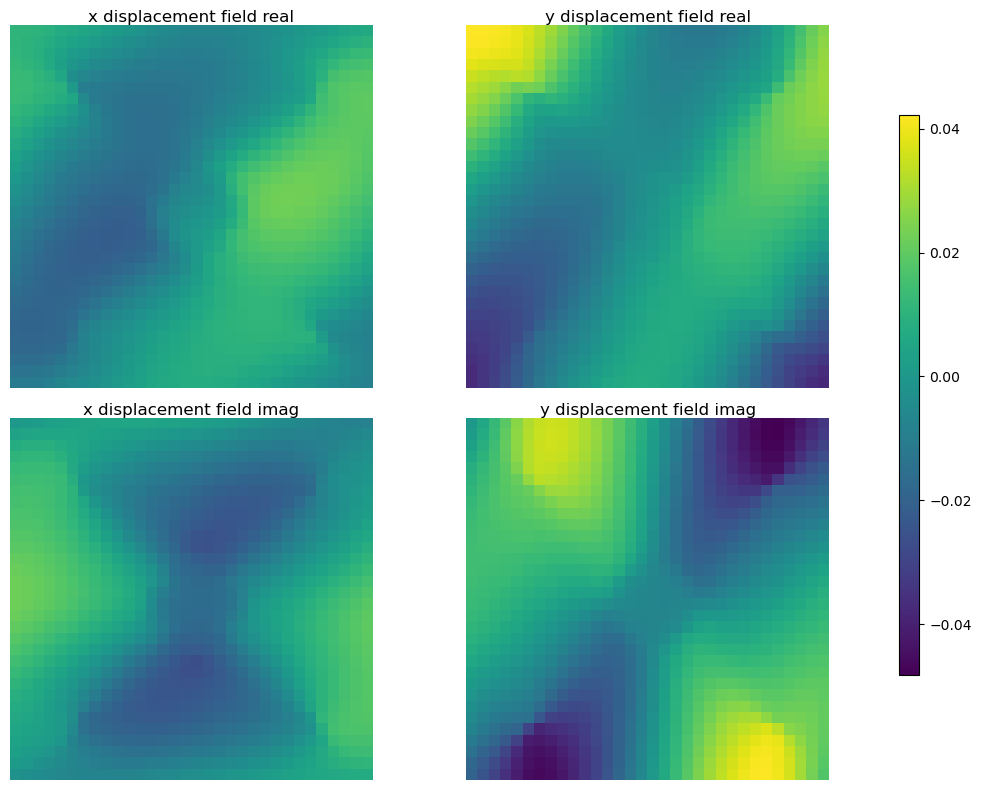

In [16]:
# View eigenvectors for the selected design, band, and wavevector
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_waveform_index}')
sample_eigenvector_x = eigenvector_data_x[sample_index, sample_waveform_index, sample_band]
sample_eigenvector_y = eigenvector_data_y[sample_index, sample_waveform_index, sample_band]

NO_utils.plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)

## Model architecture & training

In [17]:
# Import modules for building a neural operator model
import numpy as np
import scipy as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR

# Import specialized neural operator model tools
from neuralop.models import FNO, FNO2d, TFNO, TFNO2d
from neuralop import Trainer
from neuralop import LpLoss, H1Loss

# For creating datasets and data loaders for training and evaluation
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split, ConcatDataset
from sklearn.preprocessing import StandardScaler

# Optional: torchvision for augmentations and transformations (if working with image-like data)
import torchvision.transforms as transforms

# For plotting and visualization
import matplotlib.pyplot as plt

# Optional: Use tqdm for progress bars during training and evaluation
from tqdm import tqdm

# Optional: If you are working with graph data or architectures
# import torch_geometric

# If you need automatic differentiation for custom operations or gradients
from torch.autograd import Function

In [18]:
#Set the device for the neural operator model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device:', device)
print("Using PyTorch version:", torch.__version__)

# Print the shape of the first input tensor for confirmation
print("Shape of the first input tensor to be assigned:")
print("designs[0, 0]:", designs[0, 0].shape)
print("WAVEFORM_DATA[0, 0]:", waveforms[0, 0].shape)

# Print the shape of the first output tensor for confirmation
print("Shape of the first output tensor to be assigned:")
print("EIGENVECTOR_DATA_x[0, 0, 0]:", eigenvector_data_x[0, 0, 0].shape)
print("EIGENVECTOR_DATA_x[0, 0, 0]:", eigenvector_data_y[0, 0, 0].shape)

Using Device: cuda
Using PyTorch version: 2.5.1
Shape of the first input tensor to be assigned:
designs[0, 0]: (32,)
WAVEFORM_DATA[0, 0]: (32,)
Shape of the first output tensor to be assigned:
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)


In [19]:
# Create a single scaler instance
scaler = StandardScaler()

# Standardizing EIGENVALUE_DATA and casting to float16
EIGENVALUE_DATA_standardized = scaler.fit_transform(eigenvalue_data.reshape(-1, 1)).reshape(eigenvalue_data.shape)
eigenvalue_mean = scaler.mean_[0]
eigenvalue_scale = scaler.scale_[0]
EIGENVALUE_DATA_standardized = EIGENVALUE_DATA_standardized.astype(np.float16)
del eigenvalue_data

# Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
EIGENVECTOR_x_r = eigenvector_data_x.real.astype(np.float16)
EIGENVECTOR_x_i = eigenvector_data_x.imag.astype(np.float16)
del eigenvector_data_x

EIGENVECTOR_x_r_standardized = scaler.fit_transform(EIGENVECTOR_x_r.reshape(-1, 1)).reshape(EIGENVECTOR_x_r.shape)
eigvector_x_r_mean = scaler.mean_[0]
eigvector_x_r_scale = scaler.scale_[0]
EIGENVECTOR_x_r_standardized = EIGENVECTOR_x_r_standardized.astype(np.float16)

EIGENVECTOR_x_i_standardized = scaler.fit_transform(EIGENVECTOR_x_i.reshape(-1, 1)).reshape(EIGENVECTOR_x_i.shape)
eigvector_x_i_mean = scaler.mean_[0]
eigvector_x_i_scale = scaler.scale_[0]
EIGENVECTOR_x_i_standardized = EIGENVECTOR_x_i_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
EIGENVECTOR_y_r = eigenvector_data_y.real.astype(np.float16)
EIGENVECTOR_y_i = eigenvector_data_y.imag.astype(np.float16)
del eigenvector_data_y

EIGENVECTOR_y_r_standardized = scaler.fit_transform(EIGENVECTOR_y_r.reshape(-1, 1)).reshape(EIGENVECTOR_y_r.shape)
eigvector_y_r_mean = scaler.mean_[0]
eigvector_y_r_scale = scaler.scale_[0]
EIGENVECTOR_y_r_standardized = EIGENVECTOR_y_r_standardized.astype(np.float16)

EIGENVECTOR_y_i_standardized = scaler.fit_transform(EIGENVECTOR_y_i.reshape(-1, 1)).reshape(EIGENVECTOR_y_i.shape)
eigvector_y_i_mean = scaler.mean_[0]
eigvector_y_i_scale = scaler.scale_[0]
EIGENVECTOR_y_i_standardized = EIGENVECTOR_y_i_standardized.astype(np.float16)

# Standardizing WAVEVECTOR_DATA and casting to float16
WAVEVECTOR_DATA_standardized = scaler.fit_transform(waveforms.reshape(-1, 1)).reshape(waveforms.shape)
wavevector_mean = scaler.mean_[0]
wavevector_scale = scaler.scale_[0]
WAVEVECTOR_DATA_standardized = WAVEVECTOR_DATA_standardized.astype(np.float16)


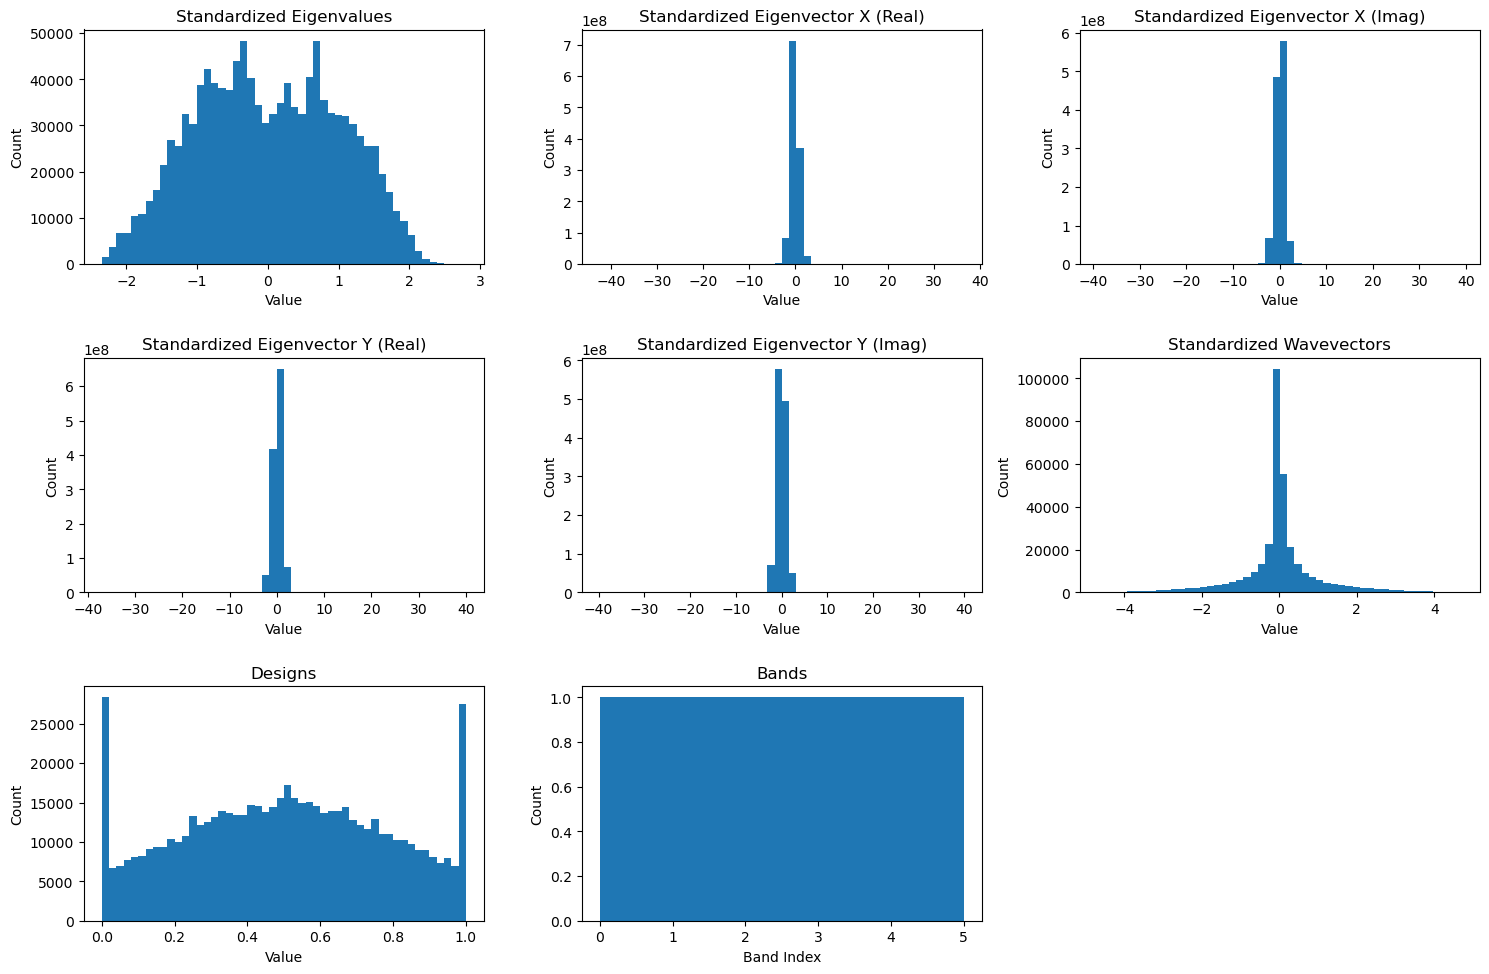

In [32]:
# Create figure with subplots for histograms
plt.figure(figsize=(15, 10))

# Plot histogram of standardized eigenvalues
plt.subplot(3, 3, 1)
plt.hist(EIGENVALUE_DATA_standardized.flatten(), bins=50)
plt.title('Standardized Eigenvalues')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of standardized eigenvector x (real)
plt.subplot(3, 3, 2)
plt.hist(EIGENVECTOR_x_r_standardized.flatten(), bins=50)
plt.title('Standardized Eigenvector X (Real)')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of standardized eigenvector x (imag)
plt.subplot(3, 3, 3)
plt.hist(EIGENVECTOR_x_i_standardized.flatten(), bins=50)
plt.title('Standardized Eigenvector X (Imag)')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of standardized eigenvector y (real)
plt.subplot(3, 3, 4)
plt.hist(EIGENVECTOR_y_r_standardized.flatten(), bins=50)
plt.title('Standardized Eigenvector Y (Real)')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of standardized eigenvector y (imag)
plt.subplot(3, 3, 5)
plt.hist(EIGENVECTOR_y_i_standardized.flatten(), bins=50)
plt.title('Standardized Eigenvector Y (Imag)')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of standardized wavevectors
plt.subplot(3, 3, 6)
plt.hist(WAVEVECTOR_DATA_standardized.flatten(), bins=50)
plt.title('Standardized Wavevectors')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of designs (assuming binary 0/1 values)
plt.subplot(3, 3, 7)
plt.hist(designs.flatten(), bins=50)
plt.title('Designs')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot histogram of bands
plt.subplot(3, 3, 8)
plt.hist(np.arange(n_bands), bins=n_bands)
plt.title('Bands')
plt.xlabel('Band Index')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [20]:
# Print shapes and data types of arrays to verify
print("EIGENVALUE_DATA_standardized shape:", EIGENVALUE_DATA_standardized.shape, "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("EIGENVECTOR_x_r_standardized shape:", EIGENVECTOR_x_r_standardized.shape, "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("EIGENVECTOR_x_i_standardized shape:", EIGENVECTOR_x_i_standardized.shape, "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("EIGENVECTOR_y_r_standardized shape:", EIGENVECTOR_y_r_standardized.shape, "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("EIGENVECTOR_y_i_standardized shape:", EIGENVECTOR_y_i_standardized.shape, "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("WAVEVECTOR_DATA_standardized shape:", WAVEVECTOR_DATA_standardized.shape, "dtype:", WAVEVECTOR_DATA_standardized.dtype)
print('\n')

# Print the mean and scale values for each standardized array
print("Eigenvalue mean, scale:", eigenvalue_mean, eigenvalue_scale)
print("Eigenvector x real mean, scale:", eigvector_x_r_mean, eigvector_x_r_scale)
print("Eigenvector x imag mean, scale:", eigvector_x_i_mean, eigvector_x_i_scale)
print("Eigenvector y real mean, scale:", eigvector_y_r_mean, eigvector_y_r_scale)
print("Eigenvector y imag mean, scale:", eigvector_y_i_mean, eigvector_y_i_scale)
print("Wavevector mean, scale:", wavevector_mean, wavevector_scale)
print('\n')

# Print the full range and data types of values for each standardized array
print("Eigenvalue range:", np.min(EIGENVALUE_DATA_standardized), np.max(EIGENVALUE_DATA_standardized), "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_standardized), np.max(EIGENVECTOR_x_r_standardized), "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_standardized), np.max(EIGENVECTOR_x_i_standardized), "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_standardized), np.max(EIGENVECTOR_y_r_standardized), "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_standardized), np.max(EIGENVECTOR_y_i_standardized), "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("Wavevector range:", np.min(WAVEVECTOR_DATA_standardized), np.max(WAVEVECTOR_DATA_standardized), "dtype:", WAVEVECTOR_DATA_standardized.dtype)

EIGENVALUE_DATA_standardized shape: (600, 325, 6) dtype: float16
EIGENVECTOR_x_r_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_x_i_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_r_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_i_standardized shape: (600, 325, 6, 32, 32) dtype: float16
WAVEVECTOR_DATA_standardized shape: (325, 32, 32) dtype: float16


Eigenvalue mean, scale: 1878.1603291255526 800.2777320234528
Eigenvector x real mean, scale: 0.0018456854386973039 0.016225094988913835
Eigenvector x imag mean, scale: -0.0008928369140793255 0.014881332736059778
Eigenvector y real mean, scale: -0.0006861322846175589 0.015982821838965548
Eigenvector y imag mean, scale: -0.0008507395951686781 0.015198877292350333
Wavevector mean, scale: 0.00038031600748028485 0.2100449812450114


Eigenvalue range: -2.348 2.797 dtype: float16
Eigenvector x real range: -42.38 36.5 dtype: float16
Eigenvector x imag range: -39.03 39.1 dtype: 

In [21]:
# Delete unused tensors to free up RAM
del EIGENVECTOR_DATA_x_flat, EIGENVECTOR_DATA_y_flat
del EIGENVECTOR_x_r, EIGENVECTOR_x_i, EIGENVECTOR_y_r, EIGENVECTOR_y_i

In [22]:
# Prepare input and output data
design_res = 32
num_samples = n_designs * n_waveforms * n_bands
input_data = torch.zeros((num_samples, 3, design_res, design_res))
output_data = torch.zeros((num_samples, 4, design_res, design_res))

sample_idx = 0
for i in range(n_designs):
    for j in range(n_waveforms):
        for k in range(n_bands):

            input_data[sample_idx, 0] = torch.from_numpy(designs[i, 0])
            input_data[sample_idx, 1] = torch.from_numpy(waveforms[j])
            input_data[sample_idx, 2] = torch.from_numpy(bands_fft[k])

            output_data[sample_idx, 0] = torch.from_numpy(EIGENVECTOR_x_r_standardized[i, j, k])
            output_data[sample_idx, 1] = torch.from_numpy(EIGENVECTOR_x_i_standardized[i, j, k])
            output_data[sample_idx, 2] = torch.from_numpy(EIGENVECTOR_y_r_standardized[i, j, k])
            output_data[sample_idx, 3] = torch.from_numpy(EIGENVECTOR_y_i_standardized[i, j, k])

            sample_idx += 1

# Create dataset
dataset = TensorDataset(input_data, output_data)

# Split dataset into train, test, and validation sets
train_size = int(0.75 * len(dataset))
test_size = int(0.2 * len(dataset))
val_size = len(dataset) - train_size - test_size

# train_dataset, test_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])

train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Train dataset size: 877500
Test dataset size: 234000
Validation dataset size: 58500


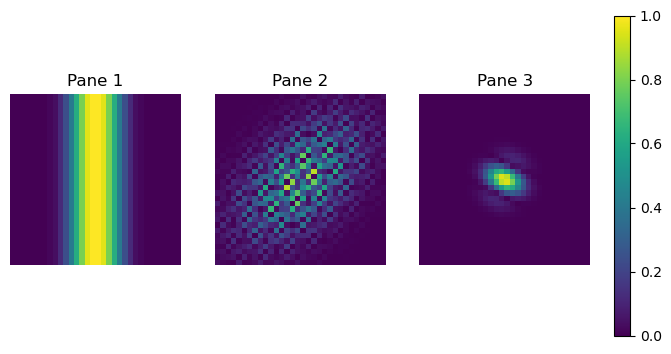

In [23]:
# Visualize a random sample input from the dataset
random_idx = np.random.randint(0, len(dataset))
random_input, random_output = dataset[random_idx]
input_shape = random_input.shape

fig, axes = plt.subplots(1, input_shape[0], figsize=(8, 8))
axes = axes.flatten()

# Create a list to store all images for finding shared colorbar range
images = []
for i in range(3):
    if i == 0:
        img = random_input[i].numpy()
    else:
        img = random_input[i].abs().numpy()
    images.append(img)

# Find global min/max for consistent colorbar
vmin = min(img.min() for img in images)
vmax = max(img.max() for img in images)

# Plot images with shared colorbar
for i in range(3):
    im = axes[i].imshow(images[i], cmap='viridis', vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Pane {i+1}')
    axes[i].axis('off')

# Add colorbar with height matching images
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.3, 0.02, 0.4])  # Reduced height from 0.6 to 0.4 and adjusted vertical position
fig.colorbar(im, cax=cbar_ax)

plt.show()

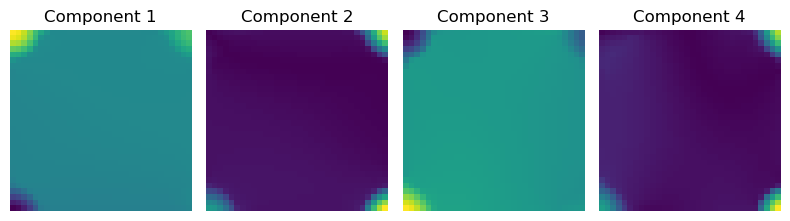

In [24]:
# Visualize a random sample output from the dataset
output_shape = random_output.shape

fig, axes = plt.subplots(1, output_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(4):
    if i % 2 == 0:
        img = random_output[i].numpy()
    else:
        img = random_output[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Component {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [25]:
# Print the shapes of the input and output data, train, test, and validation sets
print('Input data shape:', input_data.shape)
print('Output data shape:', output_data.shape)
print('Train data size:', len(train_dataset))
print('Test data size:', len(test_dataset))
print('Validation data size:', len(val_dataset))

# Inspect the first batch of data
for sample in train_loader:
    print('Batch shape:', sample[0].shape, sample[1].shape)
    #print(sample)
    break

Input data shape: torch.Size([1170000, 3, 32, 32])
Output data shape: torch.Size([1170000, 4, 32, 32])
Train data size: 877500
Test data size: 234000
Validation data size: 58500
Batch shape: torch.Size([256, 3, 32, 32]) torch.Size([256, 4, 32, 32])


In [26]:
# def check_dataloader_values(dataloader, num_batches_to_check=None):
#     """
#     Check a dataloader for NaN and infinite values.
    
#     Args:
#         dataloader: PyTorch DataLoader object
#         num_batches_to_check: Number of batches to check (None for all batches)
#     """
#     num_batches = len(dataloader) if num_batches_to_check is None else min(num_batches_to_check, len(dataloader))
    
#     has_problems = False
#     for i, (inputs, targets) in enumerate(dataloader):
#         if i >= num_batches:
#             break
            
#         # Check inputs
#         if torch.isnan(inputs).any():
#             print(f"\nFound NaN in inputs (batch {i})")
#             has_problems = True
#         if torch.isinf(inputs).any():
#             print(f"\nFound Inf in inputs (batch {i})")
#             has_problems = True
            
#         # Check targets
#         if torch.isnan(targets).any():
#             print(f"\nFound NaN in targets (batch {i})")
#             has_problems = True
#         if torch.isinf(targets).any():
#             print(f"\nFound Inf in targets (batch {i})")
#             has_problems = True
            
#         # Print progress
#         if (i + 1) % 10 == 0:
#             print(f"Checked {i + 1}/{num_batches} batches...")
    
#     if not has_problems:
#         print("\nNo NaN or Inf values found in the checked batches!")
    
#     # Print some statistics
#     print(f"\nInput range: [{inputs.min():.3f}, {inputs.max():.3f}]")
#     print(f"Target range: [{targets.min():.3f}, {targets.max():.3f}]")

# # Usage example:
# print("Checking training dataloader...")
# check_dataloader_values(train_loader, num_batches_to_check=None)  # Check first 10 batches

# print("\nChecking validation dataloader...")
# check_dataloader_values(val_loader, num_batches_to_check=None)

In [27]:
class FourierNeuralOperator(nn.Module):
    def __init__(self, modes_height, modes_width, in_channels=3, out_channels=4, hidden=32, num_layers=4):
        super(FourierNeuralOperator, self).__init__()
        self.modes_height = modes_height  # Number of Fourier modes in height dimension
        self.modes_width = modes_width  # Number of Fourier modes in width dimension
        self.hidden = hidden  # Width of the hidden channels
        self.in_channels = in_channels  # Number of input channels
        self.out_channels = out_channels  # Number of output channels
        self.num_layers = num_layers

        # FNO2d layer
        self.fno = FNO2d(in_channels=self.in_channels, 
                         out_channels=self.out_channels, 
                         n_modes_height=self.modes_height, 
                         n_modes_width=self.modes_width, 
                         hidden_channels=self.hidden, 
                         n_layers=self.num_layers)

    def forward(self, x):
        # Apply the FNO2d layer
        x = self.fno(x)
        return x

In [28]:
def train_one_epoch(model, loader, criterion, optimizer, device, epoch, report_freq=100, save_after_batch=False, save_path=None):
    model.train()
    running_loss = 0.0
    total_batches = len(loader)
    progress_bar = tqdm(enumerate(loader), total=total_batches, desc=f"Epoch {epoch + 1}")

    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        # print(f"Model output shape: {outputs.shape}")
        # print(f"Target shape: {targets.shape}")
        # print(f"Number of channels in output: {outputs.shape[1]}")
        # print(f"Data type: {outputs.dtype}")
        # print(f"Range of values: [{outputs.min().item()}, {outputs.max().item()}]")
        loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        # Print progress for each batch
        if (batch_idx + 1) % report_freq == 0 or (batch_idx + 1) == total_batches:
            progress_bar.set_postfix(batch_loss=loss.item())

        # Save model weights after each batch if the flag is set
        if save_after_batch and save_path:
            save_model(model, save_path)

    epoch_loss = running_loss / len(loader.dataset)

    # Save model weights after each epoch if the flag is not set
    if not save_after_batch and save_path:
        save_model(model, save_path)

    return epoch_loss

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(loader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
            running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

# Function to save the model weights
def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)

# Function to load the model weights
def load_model(model, file_path):
    model.load_state_dict(torch.load(file_path))

In [29]:
def plot_sample(data, title, labels, shared_colorbar=False, vmin=None, vmax=None, layout=None, save=False, save_path='plot.png'):
    # Automatically select layout based on the number of data arrays if not provided
    num_arrays = data.shape[0]
    if layout is None:
        if num_arrays == 3:
            layout = (1, 3)
        elif num_arrays == 4:
            layout = (2, 2)
        else:
            raise ValueError("Data input must have 3 or 4 arrays for plotting.")

    # Adjust figure size based on layout
    if layout == (1, 3):
        fig, axes = plt.subplots(*layout, figsize=(12, 4))  # Wide and short for 1x3 layout
    elif layout == (2, 2):
        fig, axes = plt.subplots(*layout, figsize=(8, 8))   # Square for 2x2 layout
    else:
        raise ValueError("Unsupported layout")

    for ax, (idx, label) in zip(axes.flatten(), labels):
        im = ax.imshow(data[idx, :, :].cpu(), cmap='viridis', vmin=vmin if shared_colorbar else None, vmax=vmax if shared_colorbar else None)
        ax.set_title(label)
        if not shared_colorbar:
            fig.colorbar(im, ax=ax)

    if shared_colorbar:
        # Add a single colorbar to the right of the plot
        cbar = fig.colorbar(im, ax=axes.ravel().tolist())
        cbar.ax.set_ylabel('Color scale')

    plt.suptitle(title)

    if save:
        # Save the figure
        plt.savefig(save_path)
        print(f"Plot saved at {save_path}")
        plt.close(fig)
    else:
        # Display the figure
        plt.show()

def plot_inputs(data, title, labels, save=False, save_path='example_plot.png'):
    # Plot inputs with layout (1, 3) and custom figure size
    plot_sample(data, title, labels, shared_colorbar=True, layout=(1, 3), save=save, save_path=save_path)

def plot_predictions_and_targets(inputs, outputs, targets, save=False, save_dir='figures/', file_suffix='example'):
    # Ensure save directory exists if save is True
    if save:
        os.makedirs(save_dir, exist_ok=True)

    # Add file_suffix to the filenames
    input_filename = f'{save_dir}/input_{file_suffix}.png'
    output_filename = f'{save_dir}/output_{file_suffix}.png'
    target_filename = f'{save_dir}/target_{file_suffix}.png'

    input_labels = [(0, 'geometry'), (1, 'waveform'), (2, 'band')]
    plot_inputs(inputs, 'Inputs', input_labels, save=save, save_path=input_filename)

    # Compute global min and max for shared colorbar between outputs and targets
    vmin = min(np.min(outputs.cpu().numpy()), np.min(targets.cpu().numpy()))
    vmax = max(np.max(outputs.cpu().numpy()), np.max(targets.cpu().numpy()))

    prediction_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(outputs, "Model Predictions", prediction_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=output_filename)

    target_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(targets, "Target Values", target_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=target_filename)


In [30]:
# from torchmetrics.functional import structural_similarity_index_measure as ssim

# class SSIMLoss(nn.Module):
#     def __init__(self, reduction='mean'):
#         super().__init__()
#         self.reduction = reduction
        
#     def forward(self, pred, target):
#         if pred.dim() == 3:
#             pred = pred.unsqueeze(1)
#             target = target.unsqueeze(1)
            
#         similarity = ssim(pred, target, data_range=None, k1=1e-5, k2=1e-5)
#         loss = 1.0 - similarity
        
#         # Handle reduction
#         if self.reduction == 'mean':
#             return loss.mean()
#         elif self.reduction == 'sum':
#             return loss.sum()
#         else:
#             return loss

# class SDIM(nn.Module):
#     def __init__(self, kernel_size=11, sigma=1.5, k1=0.01, k2=0.03, data_range=None):
#         super(SDIM, self).__init__()
#         self.kernel_size = kernel_size
#         self.sigma = sigma
#         self.k1 = k1
#         self.k2 = k2
#         self.data_range = data_range
        
#         # Register the Gaussian kernel as a buffer
#         self.register_buffer('kernel', self._create_gaussian_kernel(kernel_size, sigma))
        
#     def _create_gaussian_kernel(self, kernel_size, sigma):
#         """Create a 2D Gaussian kernel."""
#         # Create 1D Gaussian kernel
#         coords = torch.arange(kernel_size, dtype=torch.float)
#         coords -= kernel_size // 2
        
#         # Gaussian function
#         g = torch.exp(-(coords**2) / (2 * sigma**2))
#         g /= g.sum()
        
#         # Expand to 2D
#         kernel = g.view(1, -1) * g.view(-1, 1)
#         kernel = kernel.view(1, 1, kernel_size, kernel_size)
#         return kernel
    
#     def _gaussian_filter(self, x):
#         """Apply Gaussian filter to input."""
#         # Ensure input has the right shape
#         if x.dim() == 3:  # (B, H, W)
#             x = x.unsqueeze(1)  # (B, 1, H, W)
            
#         # Pad the input to maintain size
#         pad = self.kernel_size // 2
#         x = F.pad(x, [pad, pad, pad, pad], mode='reflect')
        
#         # Apply Gaussian filter
#         return F.conv2d(x, self.kernel, padding=0)
    
#     def forward(self, x, y):
#         """
#         Calculate SSIM between x and y.
        
#         Args:
#             x: First image tensor, shape (B, C, H, W) or (B, H, W)
#             y: Second image tensor, shape (B, C, H, W) or (B, H, W)
            
#         Returns:
#             SSIM value between x and y
#         """
#         # Ensure inputs have the right shape
#         if x.dim() == 3:  # (B, H, W)
#             x = x.unsqueeze(1)  # (B, 1, H, W)
#             y = y.unsqueeze(1)  # (B, 1, H, W)
            
#         # Determine data range if not provided
#         if self.data_range is None:
#             data_range = max(x.max() - x.min(), y.max() - y.min())
#         else:
#             data_range = self.data_range
            
#         # Calculate constants
#         c1 = (self.k1 * data_range) ** 2
#         c2 = (self.k2 * data_range) ** 2
        
#         # Calculate mean, variance, and covariance
#         mu_x = self._gaussian_filter(x)
#         mu_y = self._gaussian_filter(y)
        
#         mu_x_sq = mu_x ** 2
#         mu_y_sq = mu_y ** 2
#         mu_xy = mu_x * mu_y
        
#         sigma_x_sq = self._gaussian_filter(x ** 2) - mu_x_sq
#         sigma_y_sq = self._gaussian_filter(y ** 2) - mu_y_sq
#         sigma_xy = self._gaussian_filter(x * y) - mu_xy
        
#         # Calculate SDIM
#         numerator = (mu_x_sq + mu_y_sq + c1) * (sigma_x_sq + sigma_y_sq + c2)
#         denominator = (2 * mu_xy + c1) * (2 * sigma_xy + c2)
#         sdim_map = numerator / denominator
        
#         # Return mean SDIM
#         return sdim_map.mean()


In [31]:
# Check max values across train and val datasets
train_max_input = float('-inf')
train_max_output = float('-inf')
val_max_input = float('-inf') 
val_max_output = float('-inf')

print("Checking max values in train dataset...")
for inputs, targets in train_loader:
    train_max_input = max(train_max_input, inputs.max().item())
    train_max_output = max(train_max_output, targets.max().item())
    
print("Checking max values in validation dataset...")    
for inputs, targets in val_loader:
    val_max_input = max(val_max_input, inputs.max().item())
    val_max_output = max(val_max_output, targets.max().item())

print(f"\nTrain dataset max values:")
print(f"Input max: {train_max_input:.4f}")
print(f"Output max: {train_max_output:.4f}")

print(f"\nValidation dataset max values:")
print(f"Input max: {val_max_input:.4f}") 
print(f"Output max: {val_max_output:.4f}")


Checking max values in train dataset...
Checking max values in validation dataset...

Train dataset max values:
Input max: 1.0000
Output max: 39.9688

Validation dataset max values:
Input max: 1.0000
Output max: 38.8438


In [27]:
import kornia

# Print datatypes of one sample input and output in the dataloader
for inputs, targets in train_loader:
    print(f"Inputs dtype: {inputs.dtype}, Targets dtype: {targets.dtype}")
    break

hc = 128; lr = 1e-2; wd = 0; ss = 10; gamma = 0.1

model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, in_channels=3, out_channels=4, hidden=hc, num_layers=8).to(device)

criterion = kornia.losses.SSIMLoss(window_size=5, max_val = dataset_max, reduction='mean') # Use SSIM loss with mean reduction from kornia
criterion_tag = 'SSIM'
# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)

# Define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=ss, gamma=gamma)

Inputs dtype: torch.float32, Targets dtype: torch.float32


In [28]:
# Parameters for saving/loading model weights
save_path = f'./model_weights_'+criterion_tag+'_hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}.pth'
print(save_path)
load_existing_model = False  # Set to True if you want to load an existing model

# Load the model weights if a valid file path is provided and the flag is set
if load_existing_model and os.path.isfile(save_path):
    load_model(model, save_path)
    print(f"Loaded model weights from {save_path}")

# Lists to store losses for plotting
train_losses = []
val_losses = []

./model_weights_SSIM_hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}.pth


In [29]:
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch, report_freq=256, save_after_batch=False, save_path=save_path)
    
    val_loss = evaluate(model, val_loader, criterion, device)

    # Print progress for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save losses for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Step the scheduler
    scheduler.step(val_loss)

timestamp = datetime.now().strftime('%y%m%d-%H%M%S')
# Plot the losses
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Set the y-axis to log scale
plt.savefig(f'loss_plot_'+criterion_tag+'_{timestamp}.png')  # Save the plot as a PNG file
plt.show()  # Display the plot

Epoch 1:  15%|█▌        | 530/3428 [01:31<08:19,  5.80it/s, batch_loss=0.5]


KeyboardInterrupt: 

In [36]:
# Save the model weights at the end of training
# save_model(model, save_path)
save_path_posttraining = f'{save_path[:-4]}_e{len(train_losses)}.pth'
save_model(model, save_path_posttraining)
print(f"Saved model weights to {save_path_posttraining}")

Saved model weights to ./model_weights_L2_hc128_lr1e-02_wd0e+00_ss10_gamma1e-01_e17.pth


Sample loss: 1.017795


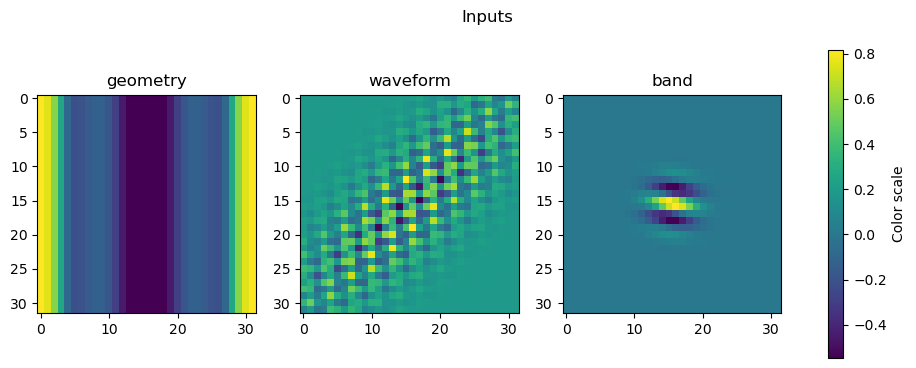

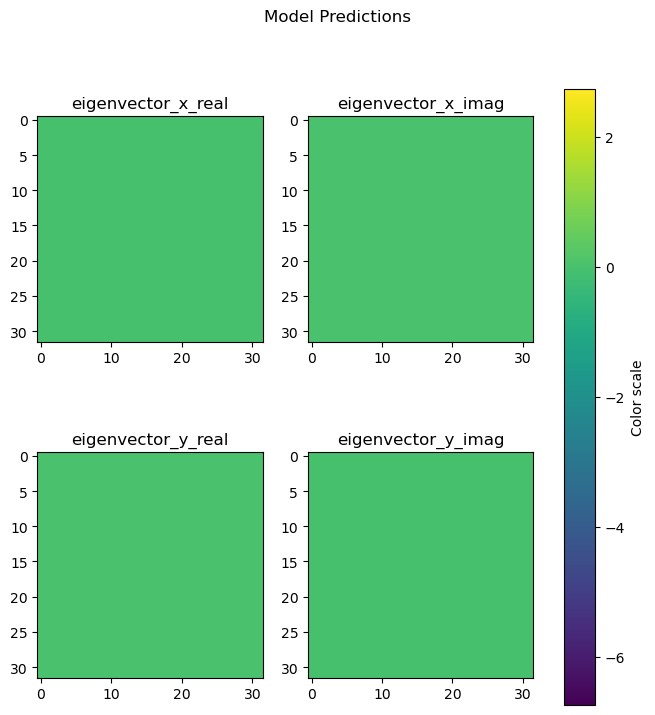

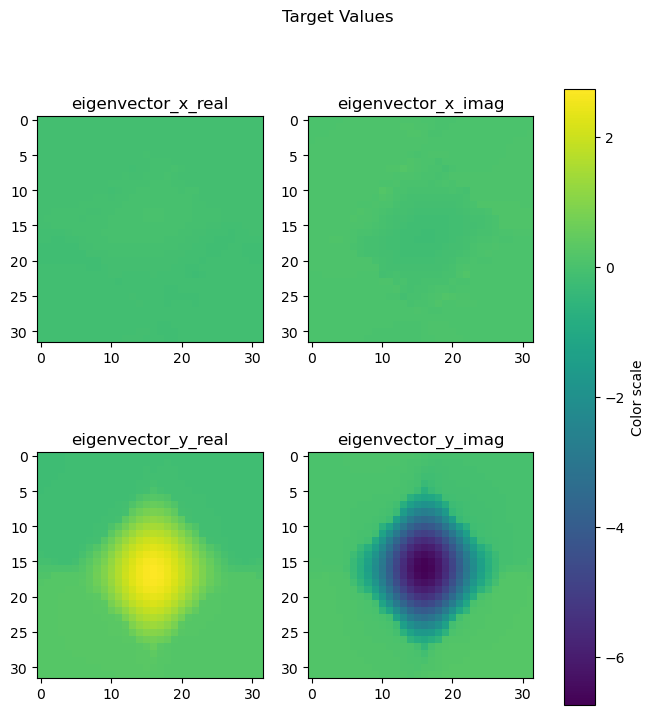

In [37]:
# Get a batch from the validation loader
inputs, targets = next(iter(val_loader))
inputs, targets = inputs.to(device), targets.to(device)

# Get a single sample from the batch
input_sample = inputs[82]
target_sample = targets[82]

# Run the model to get predictions
model.eval()
with torch.no_grad():
    output_sample = model(input_sample.unsqueeze(0)).squeeze(0)
    sample_loss = criterion(output_sample.unsqueeze(0), target_sample.unsqueeze(0))
    print(f"Sample loss: {sample_loss.item():.6f}")

# Plot the inputs, predictions, and targets
plot_predictions_and_targets(input_sample, output_sample, target_sample)


In [38]:
def plot_model_weights_histogram(model, log_scale=False, print_analytics=False):
    """
    Plots a histogram of the weight values of a given model.
    
    Parameters:
        model: The model object (e.g., PyTorch or TensorFlow model).
        log_scale (bool): If True, the y-axis of the histogram is set to logarithmic scale.
        print_analytics (bool): If True, prints the mean, standard deviation, and total number of weights.
    """
    # Extract all weight values
    weights = []

    # For PyTorch model
    if hasattr(model, "parameters"):
        for param in model.parameters():
            if param.requires_grad:  # Focus only on trainable parameters
                weights.append(param.data.cpu().numpy().flatten())

    # For TensorFlow/Keras model
    elif hasattr(model, "trainable_weights"):
        for layer_weights in model.trainable_weights:
            weights.append(layer_weights.numpy().flatten())

    else:
        raise ValueError("Unsupported model type. The model must be a PyTorch or TensorFlow model.")

    # Flatten and concatenate all weights into a single array
    all_weights = np.concatenate(weights)

    # Print analytics if the flag is set
    if print_analytics:
        mean = np.mean(all_weights)
        std_dev = np.std(all_weights)
        total_weights = all_weights.size
        print(f"Model Weight Analytics:")
        print(f"  Mean: {mean:.4f}")
        print(f"  Standard Deviation: {std_dev:.4f}")
        print(f"  Total Number of Weights: {total_weights}")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(all_weights, bins=100, alpha=0.75, color='blue', edgecolor='black')
    plt.title("Histogram of Model Weight Values")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")

    if log_scale:
        plt.yscale('log')  # Set y-axis to logarithmic scale
        plt.ylabel("Frequency (log scale)")

    plt.grid(axis='y', alpha=0.75)
    plt.show()

Model Weight Analytics:
  Mean: -0.0523-0.0005j
  Standard Deviation: 2.1171
  Total Number of Weights: 35852932


c:\Users\hz283\AppData\Local\anaconda3\envs\NO_2D_Metamaterials\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\hz283\AppData\Local\anaconda3\envs\NO_2D_Metamaterials\Lib\site-packages\numpy\lib\histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


IndexError: index 101 is out of bounds for axis 0 with size 101

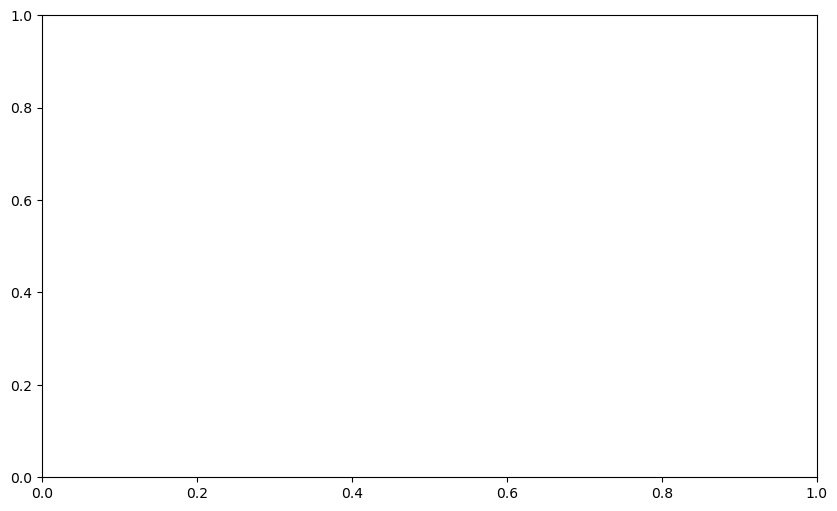

In [39]:
plot_model_weights_histogram(model, log_scale=True, print_analytics=True)

In [35]:
initialized_model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, in_channels=3, out_channels=4, hidden=hc).to(device)

Model Weight Analytics:
  Mean: 0.0000+0.0000j
  Standard Deviation: 0.0883
  Total Number of Weights: 35852932


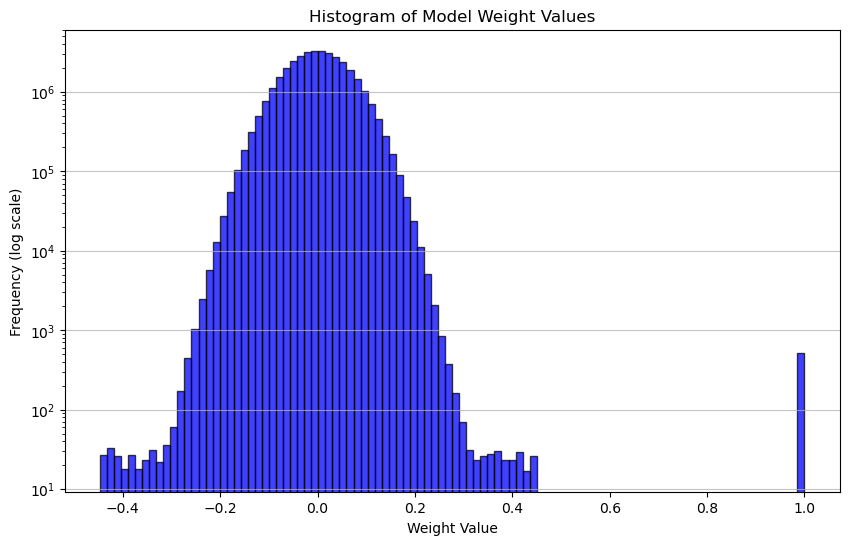

In [36]:
plot_model_weights_histogram(initialized_model, log_scale=True, print_analytics=True)